In [26]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm

## EM-алгоритм

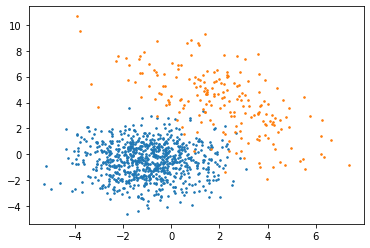

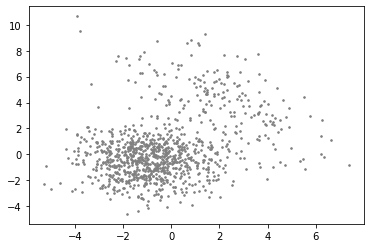

In [27]:
np.random.seed(43)

n = 1000
tau = 0.8

n1 = int(tau * n)
mu1 = np.array([-1.0, -0.5])
sigma1 = np.array([
    [2.0, 0.0],
    [0.0, 2.0],
]
)

n2 = int((1-tau) * n)
mu2 = np.array([2.0, 4.0])
sigma2 = np.array([
    [4.0, -3.0],
    [-3.0, 6.0],
]
)

x1 = np.random.multivariate_normal(mu1, sigma1, n1)
x2 = np.random.multivariate_normal(mu2, sigma2, n2)
x = np.vstack([x1, x2])

plt.figure()
plt.scatter(*x1.T,s=2.5)
plt.scatter(*x2.T,s=2.5)

plt.figure()
plt.scatter(*x.T,s=2.5,color='gray')

**Задание 2.1**

Перед вам вектор `x` который содержит в себе некоторое количество двумерных векторов, про которые известно, что они распределены как смесь двух нормальных распределений. Используя формулы EM-алгоритма из лекций, реализуйте алгоритм, и найдите параметры распределений: вектора $\mu_1$ и $\mu_2$, матрицы $\Sigma_1$, $\Sigma_2$, а так же относительное число элементов в первом распределении $\tau$.

Абсолютная точность найденных параметров должна быть лучше $10^{-4}$. Выведите на экран найденные параметры и нарисуйте график разброса точек для вектора `x` на котором цветами покажите оценку вероятности принадлежности данной точки к первому распределению.

*Бонусные баллы* можно получить за успешную попытку решить данную задачу на максимум правдоподобия "в лоб". Т.е. методом прямой максимизации логарифма функции правдоподобия
$$
\arg \max_{\mu_1, \mu_2, \Sigma_1, \Sigma_2, \tau} \sum_{i=1}^{N} \log \left(\tau N(\mathbf{x_i} | \mu_1, \Sigma_1) + (1-\tau) N(\mathbf{x_i} |\mu_2, \Sigma_2)\right)
$$
с использованием методов численной оптимизации из библиотеки `scipy`.

(0.7998987231608389, array([-0.95560948, -0.48672146]), array([[ 2.0437054 , -0.04049322],
       [-0.04049322,  1.84886221]]), array([2.03757591, 3.99567842]), array([[ 4.17115463, -2.99291335],
       [-2.99291335,  5.8198159 ]]))


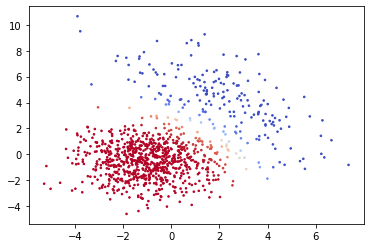

In [28]:
from scipy.stats import multivariate_normal

def T(x,theta):
    tau, mu1, sigma1, mu2, sigma2
    
    f1 = tau*multivariate_normal.pdf(x, mean=mu1, cov=sigma1)
    f2 = (1- tau)*multivariate_normal.pdf(x, mean = mu2, cov = sigma2)
    f = f1 + f2
    
    #T1 = f1/f
    #T2 = f2/f
    T1 = np.divide(f1,f,out=np.full_like(f,0.5), where =(f!=0.0))
    T2 = np.divide(f2,f,out=np.full_like(f,0.5), where =(f!=0.0))
    
    return T1,T2
    
def theta(x, old_theta):
    T1, T2 = T(x, old_theta)
    
    n1 = np.sum(T1)
    n2 = np.sum(T2)
    mu1 = np.sum(T1.reshape(-1,1)*x, axis=0)/n1
    mu2 = np.sum(T2.reshape(-1,1)*x, axis=0)/n2
    dx1=x-mu1
    dx2=x-mu2
    sigma1 = np.tensordot(T1.reshape(-1,1)*dx1,dx1,[0,0]) / n1
    sigma2 = np.tensordot(T2.reshape(-1,1)*dx2,dx2,[0,0]) / n2
    tau= n1/ (n1+n2)
    return(tau, mu1, sigma1, mu2, sigma2)

np.random.seed(42)

init_mu = np.random.uniform(np.min(x,axis=0),np.max(x,axis=0),size=(2,2))
init_sigma= np.diag(np.var(x,axis=0))
init_theta = (0.5, init_mu[0], init_sigma, init_mu[1], init_sigma) 

T1, _ = T(x, init_theta)

old_theta= init_theta                        
for i in range(0,1000):
    new_theta = theta(x,old_theta)
    old_theta = new_theta
print(old_theta)
                          
plt.figure()
plt.scatter(*x.T,s=2.5, c=T1, cmap = cm.coolwarm)

**Задание 2.2**

Решите задание **2.1** используя готовый класс `GaussianMixture` (из библиотеки `sklearn`) для аппроксимации данных смесью нормальных распределений.

[0.19919376 0.80080624]
[[ 2.01360913  4.04058324]
 [-0.94625592 -0.49281149]]
[[[ 4.22691852 -2.96315512]
  [-2.96315512  5.63251843]]

 [[ 2.07785731 -0.04242307]
  [-0.04242307  1.82204859]]]


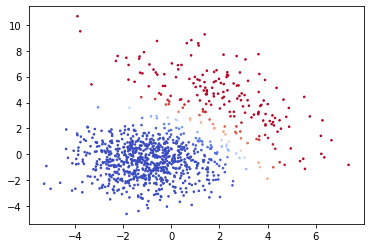

In [29]:
from sklearn.mixture import GaussianMixture

g=GaussianMixture(n_components=2)
g.fit(x)

print(g.weights_)
print(g.means_)
print(g.covariances_)

T = g.predict_proba(x)
T1 = T[:,0]
plt.figure()
plt.scatter(*x.T,s=2.5, c=T1, cmap = cm.coolwarm)

## Анализ главных компонент

/opt/conda/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


image count: 90


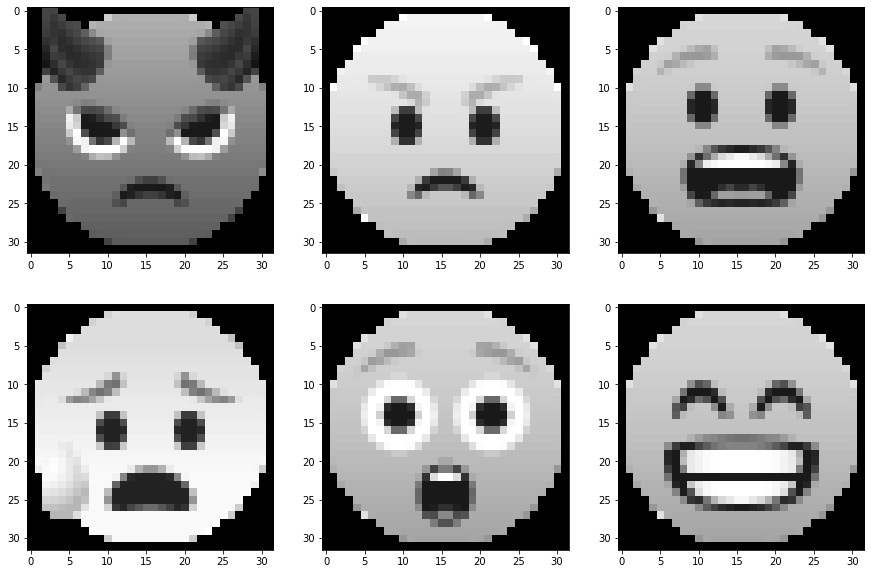

In [30]:
from PIL import Image
from glob import glob

images = [Image.open(file).convert(mode='L') for file in sorted(glob('../input/emoji/*.png'))]
print('image count:', len(images))

fig, axes = plt.subplots(2, 3, figsize=(15,10))
axes = axes.reshape(-1)
for i in range(6):
    axes[i].imshow(images[i], cmap='gray')

In [31]:
shape = images[0].size
data = np.vstack([np.array(image, dtype=float).reshape(-1) for image in images])
mean = data.mean(axis=0)
data -= mean.reshape(1, -1)

In [32]:
u, s, v = np.linalg.svd(data)

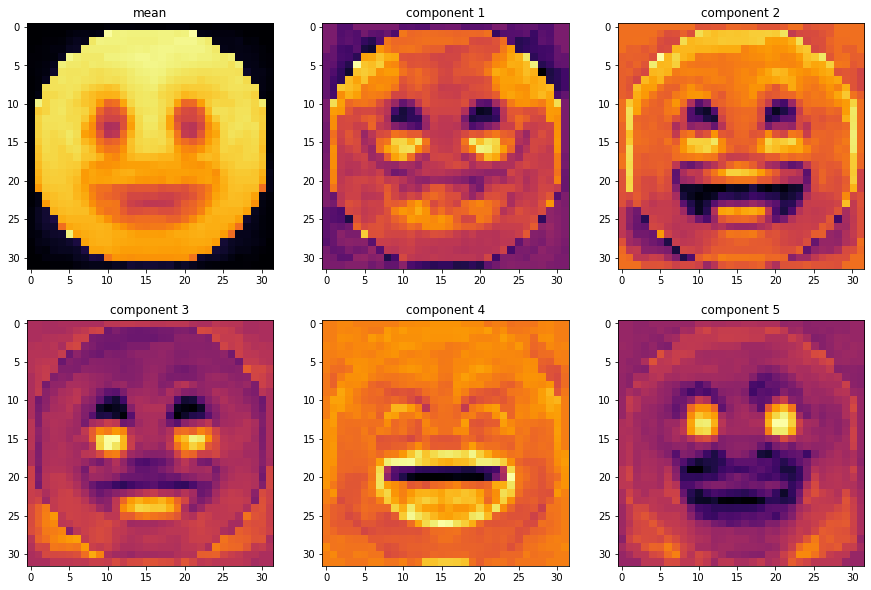

In [33]:
fig, axes = plt.subplots(2, 3, figsize=(15,10))
axes = axes.reshape(-1)
axes[0].set_title('mean')
axes[0].imshow(mean.reshape(shape), cmap='inferno')
for i in range(5):
    axes[i+1].set_title('component {}'.format(i + 1))
    axes[i+1].imshow(v[i].reshape(shape), cmap='inferno')

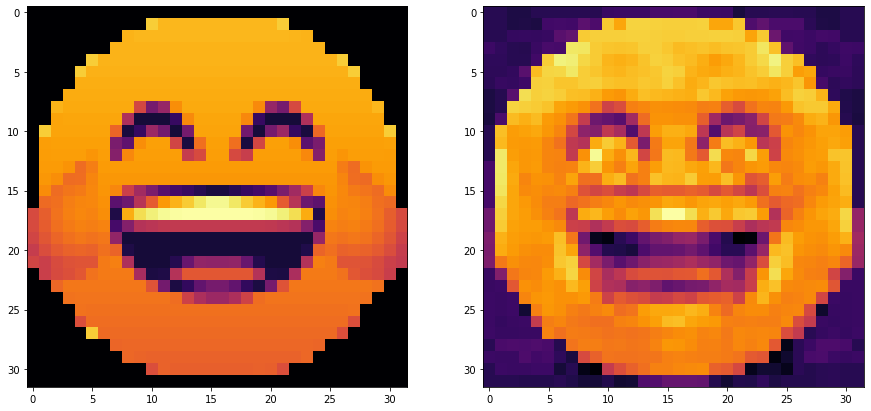

In [34]:
decoder = v[:20, :]
x = data[30, :]
x_hat = np.dot(decoder.T, np.dot(decoder, x))

fig, axes = plt.subplots(1, 2, figsize=(15,10))
axes[0].imshow((x+mean).reshape(shape), cmap='inferno')
axes[1].imshow((x_hat+mean).reshape(shape), cmap='inferno')

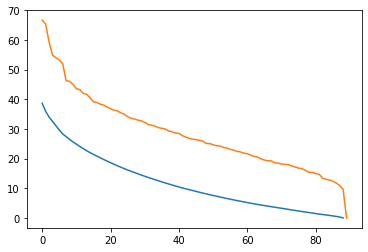

In [35]:
def evaluate_std(decoder_size):
    decoder = v[:decoder_size, :]
    data_hat = np.dot(decoder.T, np.dot(decoder, data.T))
    return np.std(data_hat - data.T)

std = [evaluate_std(s) for s in range(1,data.shape[0])]
plt.figure()
plt.plot(std)
plt.plot(np.sqrt(s))

**Задание 2.3**

Перед вами в массиве `image` хранится набор смайликов. Используя готовый класс `PCA` (из библиотеки `sklearn`) для анализа главных компонент, выполните анализ этого набора данных. Постройте изображения первых пяти главных компонент и среднего.

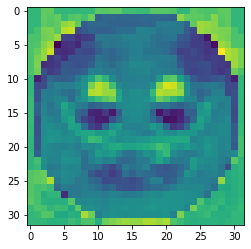

In [36]:
from sklearn.decomposition import PCA

d = PCA()
data = np.vstack([np.array(image, dtype=float).reshape(-1) for image in images])
z = d.fit_transform(data)
plt.imshow(d.components_[0].reshape(32,32))



## Метод опорных векторов

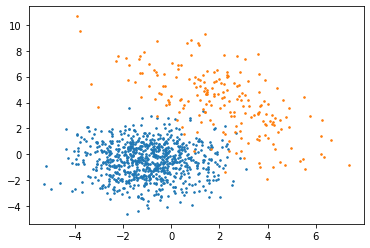

In [37]:
np.random.seed(43)

x1 = np.random.multivariate_normal(mu1, sigma1, n1)
x2 = np.random.multivariate_normal(mu2, sigma2, n2)
x = np.concatenate([x1, x2])
y = np.concatenate([np.full(x1.shape[0], 0), np.full(x2.shape[0], 1)])

plt.figure()
plt.scatter(*x1.T,s=2.5)
plt.scatter(*x2.T,s=2.5)

**Задание 2.4**

Перед вами данные из задания **2.1**, однако теперь в векторе `y` записан номер распределения к которому принадлежит двухмерная точка. Используя метод опорных векторов `SVC` из пакета `sklearn` с линейным ядром, постройте бинарный классификатор для этих данных. Нанесите раделяющую гиперплоскость (в нашем случае прямую) на график разброса точек.
На графике разброса точек цветом обозначьте вероятность принадлежности к первому классу (распределению) по мнению классификатора. Вам поможет метод `predict_proba()`.

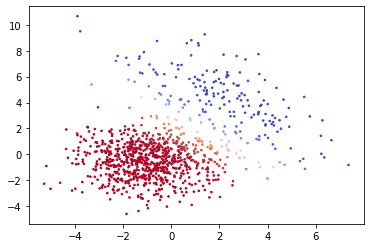

In [38]:
from sklearn.svm import  SVC

c=SVC(random_state=42, kernel = 'linear',probability=True)
c.fit(x,y)


line_x = np.linspace(0,1,100)
#line_x = np.linspace(np.min[1,0],np.max[1,0],100)
line_y = line_x - c.intercept_[0] 

T = c.predict_proba(x)
T1 = T[:,0]
plt.figure()
plt.scatter(*x.T, s=2.5, c=T1, cmap = cm.coolwarm)

In [39]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

names = ["length", "width", "size", "conc", "conc1", "asym", "m3long", "m3trans", "alpha", "dist", "class"]
data = pd.read_csv('../input/magic04/magic04.csv', names=names)

x = np.asarray(data.iloc[:, :-1])
y = np.asarray(data.iloc[:, [-1]])

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

**Задание 2.5**

Ниже определена функция `evaluate`, она нужна для того, чтобы строить график ROC и печатать на экран различные численные меры эффективности бинарного классификатора для данных из задания **1.4**. К сожалению, некоторые формулы потерялись. Восстановите формулы и примените функцию для оценки бинарных классификаторов на базе логистической регрессии `LogisticRegression` и метода опорных векторов `SVC`.

In [40]:
import sklearn.metrics

def evaluate(c, x, y):
    y_pred = c.predict(x)
    scores = c.decision_function(x)
    
    tn, fp, fn, tp = sklearn.metrics.confusion_matrix(y, y_pred, labels=['h', 'g']).ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    specificity = tn / (tn + fp)
    baccuracy = 0.5 * (specificity + recall)
    f1 = 2 * precision * recall / (precision + recall)
    
    print("Accuracy                  = {:.4f}".format(accuracy))
    print("Ballanced accuracy        = {:.4f}".format(baccuracy))
    print("F1                        = {:.4f}".format(f1))
    print("Precision (PPV)           = {:.4f}".format(precision))
    print("Recall (sensitivity, TPR) = {:.4f}".format(recall))
    print("Specificity (TNR, 1-FPR)  = {:.4f}".format(specificity))
    

    min_score, max_score = np.min(scores), np.max(scores)
    bins = np.linspace(min_score, max_score, 25)
    plt.figure()
    plt.hist(scores[y.reshape(-1) == 'h'], bins, alpha=0.5, label='Hadron (negative)')
    plt.hist(scores[y.reshape(-1) == 'g'], bins, alpha=0.5, label='Gamma (positive)')
    plt.xlabel("Decision function (value)")
    plt.ylabel("Frequency")
    plt.legend()
    
    tpr, fpr, _ = sklearn.metrics.roc_curve(y, scores, pos_label='g')
    auc = sklearn.metrics.roc_auc_score(y, scores)
    plt.figure()
    plt.plot(fpr, tpr)
    plt.title("Receiver operating characteristic")
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    print("AUC                       = {:.4f}".format(auc))
    

Accuracy                  = 0.7893
Ballanced accuracy        = 0.7429
F1                        = 0.8470
Precision (PPV)           = 0.8022
Recall (sensitivity, TPR) = 0.8972
Specificity (TNR, 1-FPR)  = 0.5887
AUC                       = 0.8409


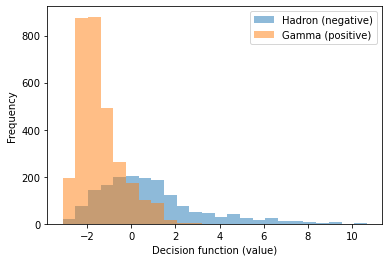

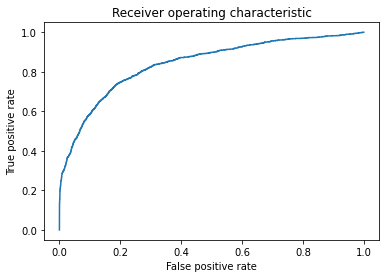

In [41]:
from sklearn.linear_model import LogisticRegression

c = LogisticRegression(random_state=42, solver="newton-cg")
c.fit(x_train, y_train.reshape(-1))

evaluate(c, x_test, y_test)

Accuracy                  = 0.6589
Ballanced accuracy        = 0.5127
F1                        = 0.7921
Precision (PPV)           = 0.6561
Recall (sensitivity, TPR) = 0.9990
Specificity (TNR, 1-FPR)  = 0.0265
AUC                       = 0.7582


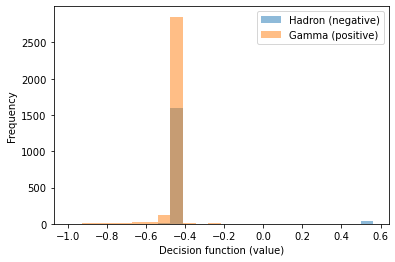

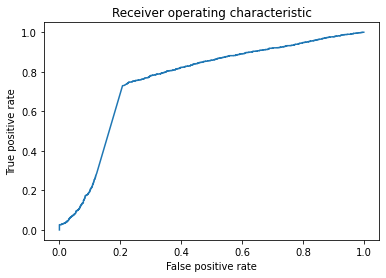

In [42]:
from sklearn.svm import SVC

c = SVC(gamma='auto')
c.fit(x_train, y_train.reshape(-1))

evaluate(c, x_test, y_test)

In [43]:
def flat_dict(x):
    if len(x) == 0:
        return dict()
    return {k: np.asarray([e[k] for e in x]) for k in x[0].keys()}

In [44]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import make_scorer

C_grid = np.array([1, 10, 100, 1000])

scoring = {
    "auc":       "roc_auc",
    "accuracy":  "accuracy",
    "precision": make_scorer(precision_score, pos_label='g'),
    "recall":    make_scorer(recall_score, pos_label='g'),
}

scores = []

for C in C_grid:
    c = SVC(random_state=42, C=C, gamma='auto')
    s = cross_validate(c, x, y.reshape(-1), cv=5, scoring=scoring)
    scores.append(s)
    
scores = flat_dict(scores)

np.set_printoptions(precision=4)
print("fit time = {}".format(scores['fit_time'].mean(axis=1)))
for s in scoring.keys():
    print("{} = {}".format(s, scores["test_{}".format(s)].mean(axis=1)))

fit time = [34.6607 53.9809 53.7257 53.6507]
auc = [0.7522 0.7522 0.7522 0.7522]
accuracy = [0.6574 0.6562 0.6562 0.6562]
precision = [0.6544 0.6541 0.6541 0.6541]
recall = [0.9991 0.9969 0.9969 0.9969]


**Задание 2.6**

Используя метод кросс-валидации, протестируйте различные ядра для метода опорных векторов и данных из задания **1.4**:
полиномиальное ядро с показателями от 3 до 7 включительно, RBF ядро, сигмоидное ядро.
Получите таблицу значений точности и AUC для всех случаев.

Accuracy                  = 0.8145
Ballanced accuracy        = 0.7512
F1                        = 0.8709
Precision (PPV)           = 0.7956
Recall (sensitivity, TPR) = 0.9618
Specificity (TNR, 1-FPR)  = 0.5406
AUC                       = 0.8701


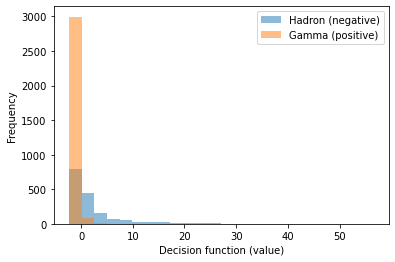

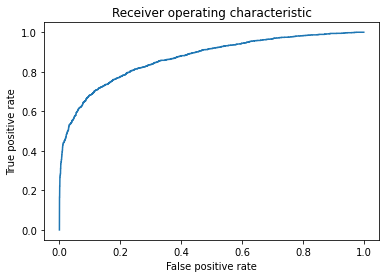

In [45]:
from sklearn.svm import SVC


c=SVC(random_state=42, kernel = 'poly', degree=3, probability=True)
c.fit(x_train, y_train.reshape(-1))

evaluate(c, x_test, y_test)

Accuracy                  = 0.8103
Ballanced accuracy        = 0.7430
F1                        = 0.8689
Precision (PPV)           = 0.7889
Recall (sensitivity, TPR) = 0.9670
Specificity (TNR, 1-FPR)  = 0.5189
AUC                       = 0.8685


TypeError: 'NoneType' object is not subscriptable

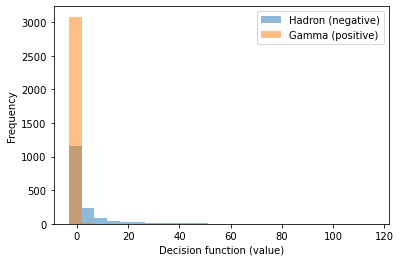

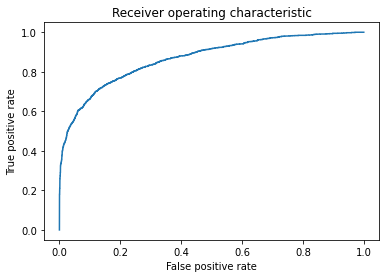

In [66]:
from sklearn.svm import SVC


c=SVC(random_state=42, kernel = 'poly', degree=4, probability=True)
c.fit(x_train, y_train.reshape(-1))

evaluate(c, x_test, y_test)

Accuracy                  = 0.8034
Ballanced accuracy        = 0.7318
F1                        = 0.8651
Precision (PPV)           = 0.7808
Recall (sensitivity, TPR) = 0.9699
Specificity (TNR, 1-FPR)  = 0.4937
AUC                       = 0.8657


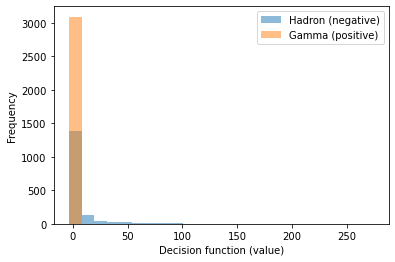

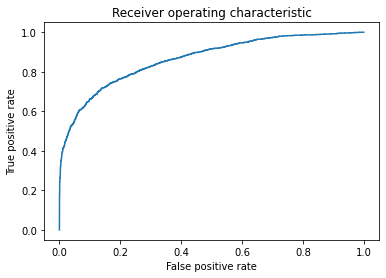

In [47]:
from sklearn.svm import SVC


c=SVC(random_state=42, kernel = 'poly', degree=5, probability=True)
c.fit(x_train, y_train.reshape(-1))

evaluate(c, x_test, y_test)

Accuracy                  = 0.7968
Ballanced accuracy        = 0.7211
F1                        = 0.8617
Precision (PPV)           = 0.7731
Recall (sensitivity, TPR) = 0.9732
Specificity (TNR, 1-FPR)  = 0.4690
AUC                       = 0.8588


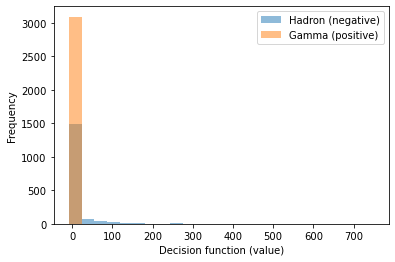

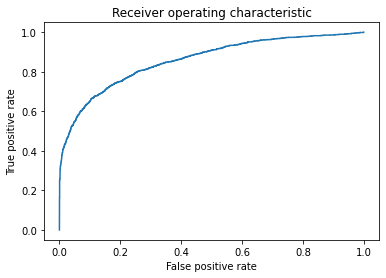

In [48]:
from sklearn.svm import SVC


c=SVC(random_state=42, kernel = 'poly', degree=6, probability=True)
c.fit(x_train, y_train.reshape(-1))

evaluate(c, x_test, y_test)

Accuracy                  = 0.7912
Ballanced accuracy        = 0.7114
F1                        = 0.8588
Precision (PPV)           = 0.7663
Recall (sensitivity, TPR) = 0.9767
Specificity (TNR, 1-FPR)  = 0.4462
AUC                       = 0.8529


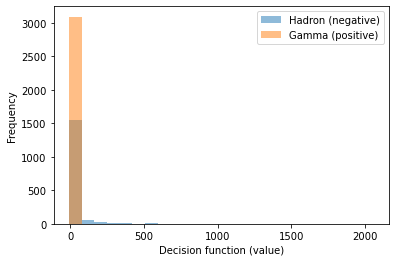

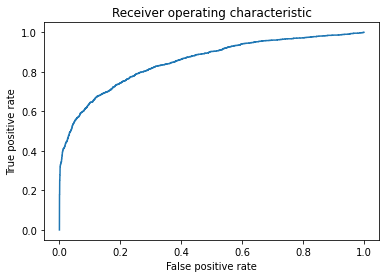

In [49]:
from sklearn.svm import SVC


c=SVC(random_state=42, kernel = 'poly', degree=7, probability=True)
c.fit(x_train, y_train.reshape(-1))

evaluate(c, x_test, y_test)

Accuracy                  = 0.8261
Ballanced accuracy        = 0.7704
F1                        = 0.8772
Precision (PPV)           = 0.8107
Recall (sensitivity, TPR) = 0.9557
Specificity (TNR, 1-FPR)  = 0.5851
AUC                       = 0.8760


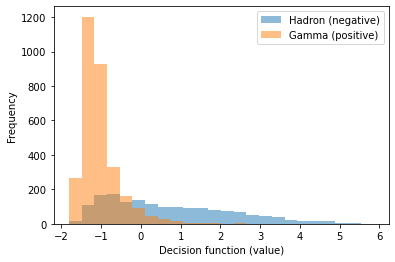

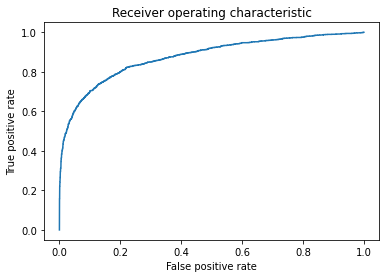

In [50]:
from sklearn.svm import SVC


c=SVC(random_state=42, kernel = 'rbf')
c.fit(x_train, y_train.reshape(-1))

evaluate(c, x_test, y_test)

Accuracy                  = 0.6294
Ballanced accuracy        = 0.5904
F1                        = 0.7165
Precision (PPV)           = 0.7129
Recall (sensitivity, TPR) = 0.7202
Specificity (TNR, 1-FPR)  = 0.4606
AUC                       = 0.6565


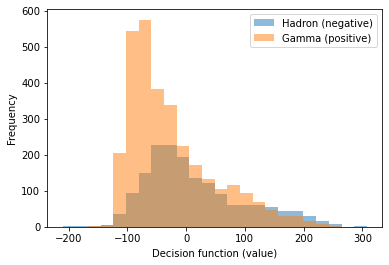

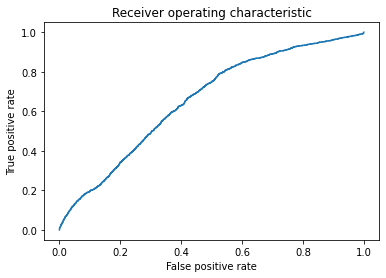

In [51]:
from sklearn.svm import SVC


c=SVC(random_state=42, kernel = 'sigmoid')
c.fit(x_train, y_train.reshape(-1))

evaluate(c, x_test, y_test)

Text(0.5, 0, 'n')

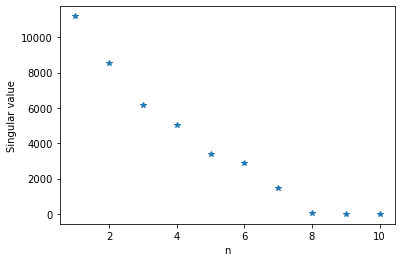

In [52]:
d = PCA()
z = d.fit_transform(x)
plt.plot(np.arange(1, d.singular_values_.shape[0]+1), d.singular_values_, '*')
plt.ylabel("Singular value")
plt.xlabel("n")

**Задание 2.7**

Используя метод кросс-валидации, протестируйте метод опорных векторов для данных из задания **1.4** в следующих ситуациях.
Используйте анализ главных компонент для исходных данных, затем используйте для обечения классификатора только $n$ полученных главных компонент. Исследуйте все возможные значения $n$.
Получите таблицу значений точности и AUC для всех случаев.
Постройте график зависимости AUC от размерности используемых входных предикторов.

Accuracy                  = 0.6770
Ballanced accuracy        = 0.5478
F1                        = 0.7974
Precision (PPV)           = 0.6733
Recall (sensitivity, TPR) = 0.9777
Specificity (TNR, 1-FPR)  = 0.1179
AUC                       = 0.5857
Accuracy                  = 0.7182
Ballanced accuracy        = 0.6082
F1                        = 0.8180
Precision (PPV)           = 0.7051
Recall (sensitivity, TPR) = 0.9741
Specificity (TNR, 1-FPR)  = 0.2423
AUC                       = 0.6607
Accuracy                  = 0.7291
Ballanced accuracy        = 0.6222
F1                        = 0.8244
Precision (PPV)           = 0.7125
Recall (sensitivity, TPR) = 0.9780
Specificity (TNR, 1-FPR)  = 0.2664
AUC                       = 0.6799
Accuracy                  = 0.7449
Ballanced accuracy        = 0.6467
F1                        = 0.8323
Precision (PPV)           = 0.7269
Recall (sensitivity, TPR) = 0.9735
Specificity (TNR, 1-FPR)  = 0.3199
AUC                       = 0.7375
Accuracy            

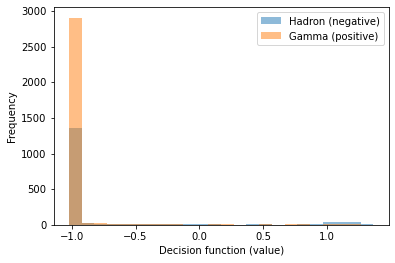

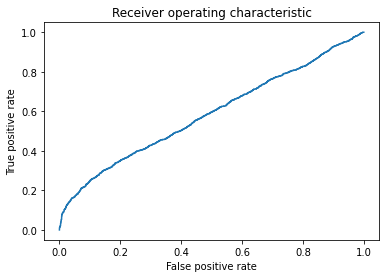

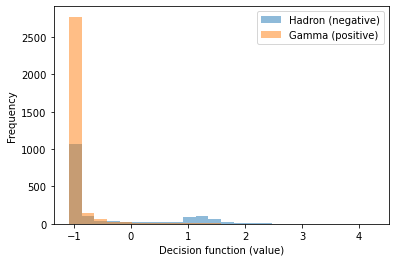

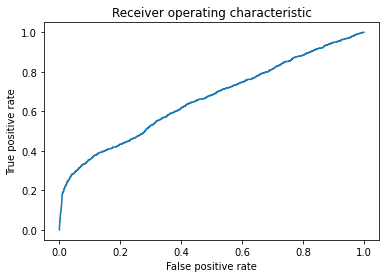

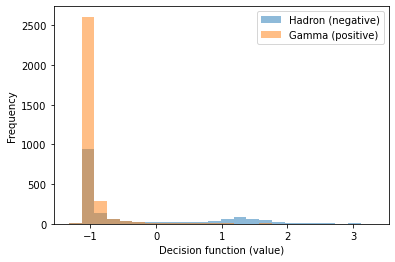

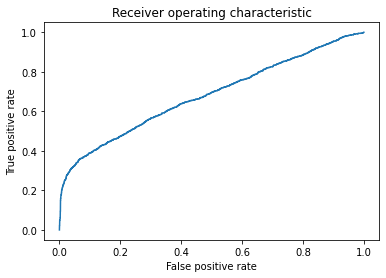

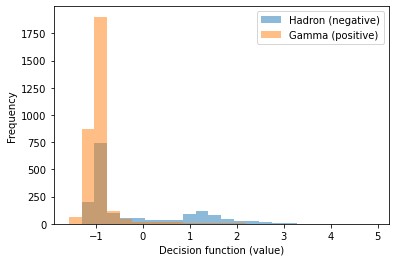

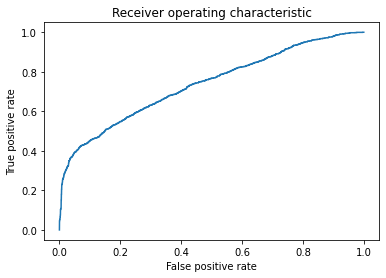

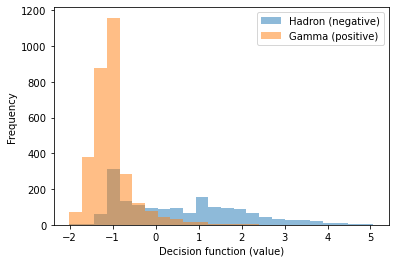

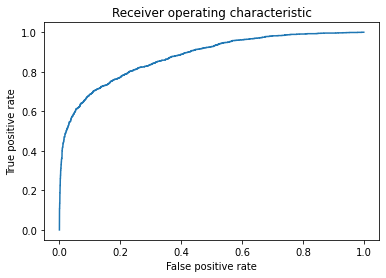

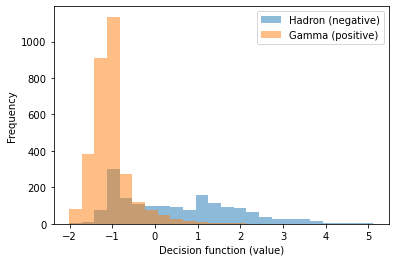

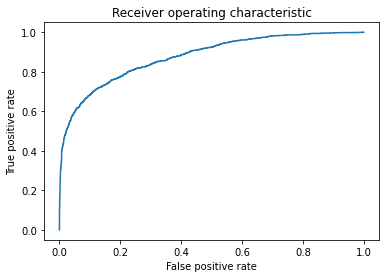

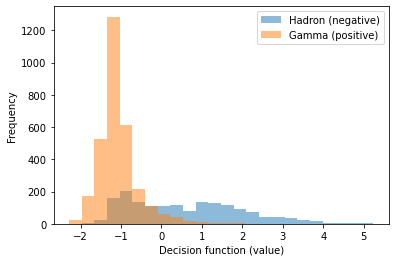

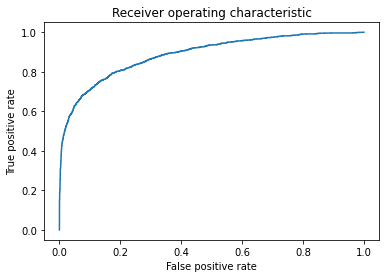

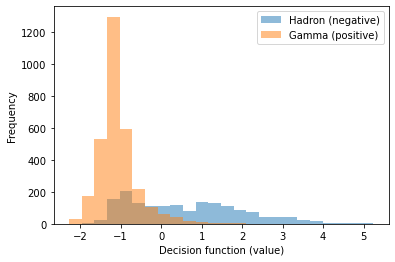

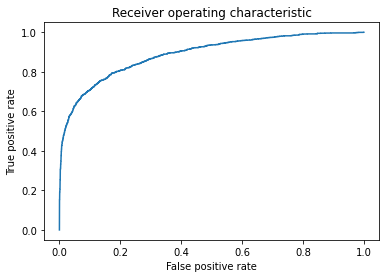

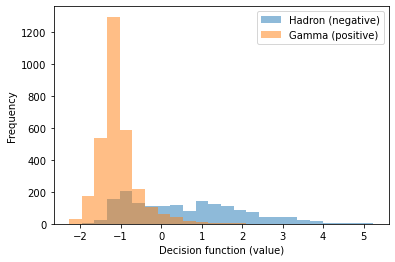

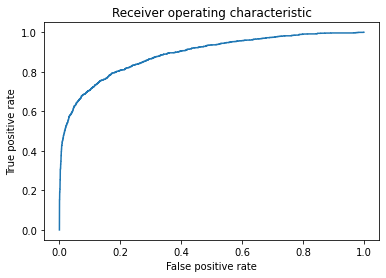

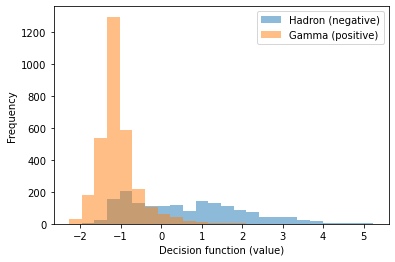

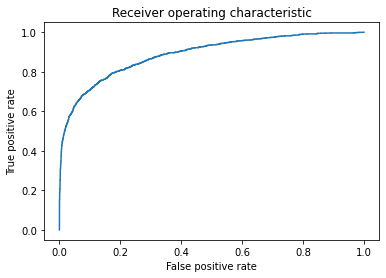

In [54]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA

auc=[]
i=1

for i in range(10):
    d = PCA(n_components = i+1)
    z_train = d.fit_transform(x_train)
    z_test = d.transform(x_test)
    c = SVC(random_state=42, probability = True)
    c.fit(z_train, y_train.reshape(-1))
    auc.append(evaluate(c, z_test, y_test))
print()

**Задание 2.8**

Проделайте такое же исследование, что и в задании **2.7**, но в этот раз исключайте по одной главной компоненте от первой до последней.

In [55]:
x_train.data.shape

(14265, 10)

№ = 10:
Accuracy                  = 0.6770
Ballanced accuracy        = 0.5478
F1                        = 0.7974
Precision (PPV)           = 0.6733
Recall (sensitivity, TPR) = 0.9777
Specificity (TNR, 1-FPR)  = 0.1179
AUC                       = 0.5850
№ = 9:
Accuracy                  = 0.6770
Ballanced accuracy        = 0.5478
F1                        = 0.7974
Precision (PPV)           = 0.6733
Recall (sensitivity, TPR) = 0.9777
Specificity (TNR, 1-FPR)  = 0.1179
AUC                       = 0.5822
№ = 8:
Accuracy                  = 0.6770
Ballanced accuracy        = 0.5478
F1                        = 0.7974
Precision (PPV)           = 0.6733
Recall (sensitivity, TPR) = 0.9777
Specificity (TNR, 1-FPR)  = 0.1179
AUC                       = 0.5822
№ = 7:
Accuracy                  = 0.6770
Ballanced accuracy        = 0.5478
F1                        = 0.7974
Precision (PPV)           = 0.6733
Recall (sensitivity, TPR) = 0.9777
Specificity (TNR, 1-FPR)  = 0.1179
AUC                       

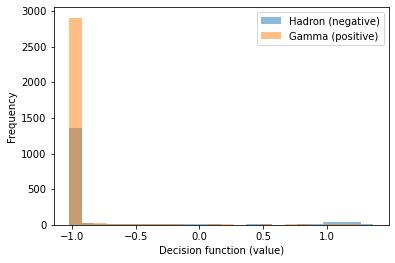

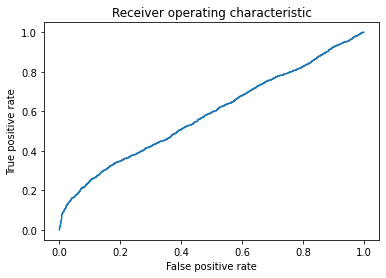

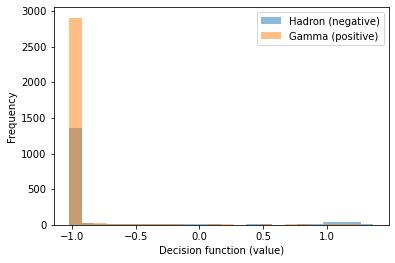

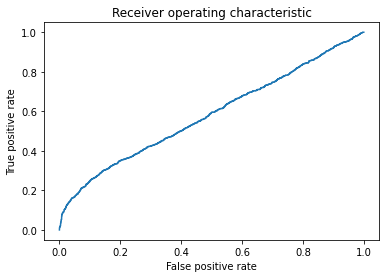

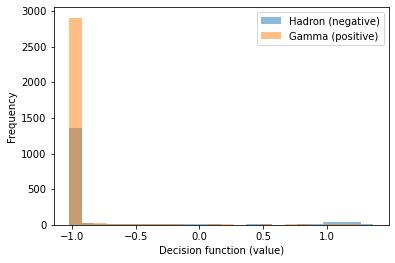

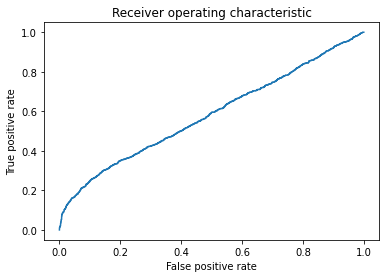

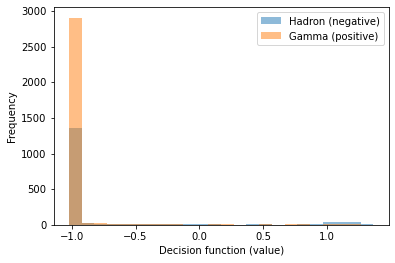

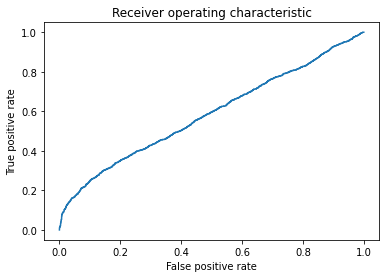

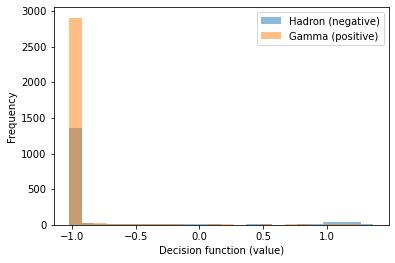

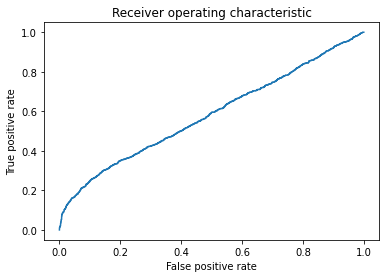

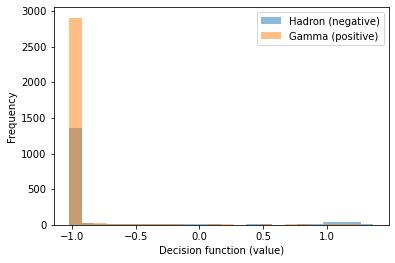

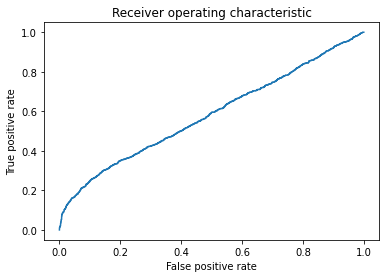

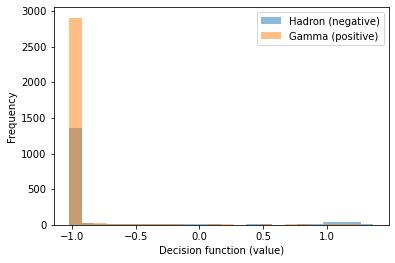

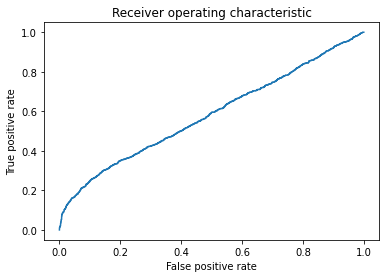

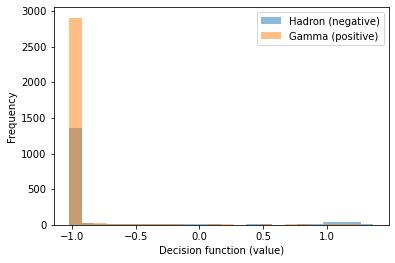

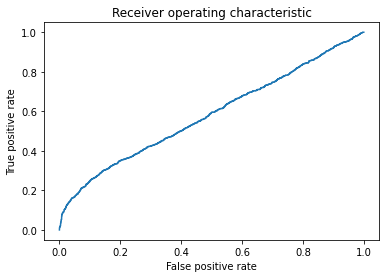

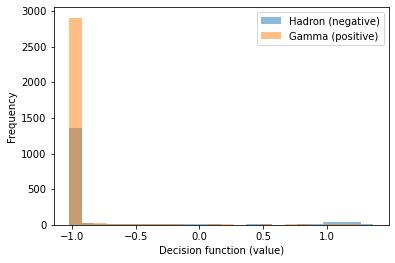

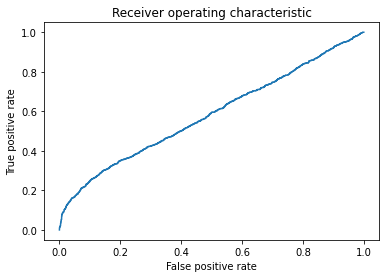

In [56]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA

i=1
auc=[]

for i in range(10):
    stop_pca = x_train.data.shape
    d = PCA(n_components = 1)
    z_train = d.fit_transform(x_train)
    z_test = d.transform(x_test)
    c = SVC(random_state=42, probability = True)
    c.fit(z_train, y_train.reshape(-1))
    print ('n = %d:' % (11-i))
    auc.append(evaluate(c, z_test, y_test))
    i=i+1
print()

**Задание 2.9**

*Бонусные баллы* можно заработать если предъявить классификатор на основе метода опорных векторов для данных из задания **1.4**, который имел бы наилучшее значение AUC (среди всей группы). Попробуйте перебрать различные гиперпараметры: значения параметра $C$, разные типы ядер, применить анализ главных компонент, и т.п.